# Declaration of Originality

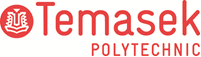

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :2404352C
* Tutorial Group                :P06
* Tutor						    :Emile SABASTIAN 
* Submission Date               :11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Business Understanding
Goal: 

The goal of this project is to build a model that helps people estimate the interest rate they are likely to receive before applying for a loan. By using basic financial and credit information, the model provides an early indication of potential loan costs, allowing users to make more informed decisions and compare options before committing to an application.

People would want this so they can understand how affordable a loan might be before applying.
Knowing the likely interest rate helps them plan their finances, avoid unexpected costs, and decide whether it is worth proceeding with a loan application.

# 2. Data Understanding

## 2.1 Load dataset

In [492]:
df = pd.read_csv(
    "Anonymize_Loan_Default_data.csv",
    encoding="latin-1"
)

## 2.2 Summary Statistics

In [493]:
print("Dataset shape:", df.shape)
print("")
print(df.head())

Dataset shape: (38480, 37)

   Unnamed: 0      id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           2       2          2        0.0          0.0              0.0   
1           3  545583     703644     2500.0       2500.0           2500.0   
2           4  532101     687836     5000.0       5000.0           5000.0   
3           5  877788    1092507     7000.0       7000.0           7000.0   
4           6  875406    1089981     2000.0       2000.0           2000.0   

        term  int_rate  installment emp_length  ... total_acc  total_pymnt  \
0  36 months      0.00         0.00   < 1 year  ...       1.0     0.000000   
1  36 months     13.98        85.42    4 years  ...      10.0  3075.291779   
2  36 months     15.95       175.67    4 years  ...      15.0  2948.760000   
3  36 months      9.91       225.58  10+ years  ...      20.0  8082.391880   
4  36 months      5.42        60.32  10+ years  ...      15.0  2161.663244   

  total_pymnt_inv total_rec_prncp total_

In [494]:
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0                  int64
id                          int64
member_id                   int64
loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs               float64
earliest_cr_line           object
inq_last_6mths            float64
mths_since_last_delinq    float64
open_acc                  float64
pub_rec                   float64
revol_bal                 float64
revol_util                 object
total_acc                 float64
total_pymnt               float64
t

In [495]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_pr

In [496]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

print("\nFEATURE TYPE SUMMARY")
print("-" * 50)
print(f"Numerical ({len(num_cols)}):")
print(list(num_cols))

print(f"\nCategorical ({len(cat_cols)}):")
print(list(cat_cols))




FEATURE TYPE SUMMARY
--------------------------------------------------
Numerical (23):
['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'repay_fail']

Categorical (14):
['term', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [497]:
print("\nNUMERICAL SUMMARY STATISTICS")
print("-" * 50)
print(df[num_cols].describe().T)


NUMERICAL SUMMARY STATISTICS
--------------------------------------------------
                          count           mean            std  min  \
Unnamed: 0              38480.0   19240.500000   11108.363516  1.0   
id                      38480.0  664997.930016  219232.159934  1.0   
member_id               38480.0  826189.854288  279353.137600  1.0   
loan_amnt               38479.0   11094.727644    7405.416042  0.0   
funded_amnt             38479.0   10831.856337    7146.853682  0.0   
funded_amnt_inv         38479.0   10150.141518    7128.026828  0.0   
int_rate                38480.0      12.164300       3.737440  0.0   
installment             38479.0     323.163255     209.089097  0.0   
annual_inc              38478.0   68995.308917   64476.388744  0.0   
dti                     38480.0      13.378119       6.744356  0.0   
delinq_2yrs             38479.0       0.151927       0.507592  0.0   
inq_last_6mths          38479.0       1.083942       1.534814  0.0   
mths_sinc

Now to see what kind of object data types i am working with

In [498]:
print("\nCATEGORICAL VALUE COUNTS")
print("-" * 50)

for col in cat_cols:
    print("")
    print(df[col].value_counts())


CATEGORICAL VALUE COUNTS
--------------------------------------------------

term
36 months    28593
60 months     9887
Name: count, dtype: int64

emp_length
10+ years    8465
< 1 year     4565
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: count, dtype: int64

home_ownership
RENT        18253
MORTGAGE    17140
OWN          2958
OTHER         125
NONE            4
Name: count, dtype: int64

verification_status
Not Verified       16962
Verified           12170
Source Verified     9348
Name: count, dtype: int64

issue_d
Nov-11    2068
Dec-11    2056
Oct-11    1922
Sep-11    1852
Aug-11    1745
Jul-11    1672
Jun-11    1644
May-11    1544
Apr-11    1405
Mar-11    1300
Jan-11    1255
Dec-10    1208
Feb-11    1184
Oct-10    1120
Jul-10    1099
Nov-10    1097
Sep-10    1069
Aug-10    1069
Jun-10     993
May-10     896
Apr-10     832
Mar-10     748
Feb-10     620
Nov-09   

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

There is a obvious outlier if 100.99& interest

In [499]:
print(df["int_rate"].describe())

count    38480.00000
mean        12.16430
std          3.73744
min          0.00000
25%          9.62000
50%         11.99000
75%         14.72000
max        100.99000
Name: int_rate, dtype: float64


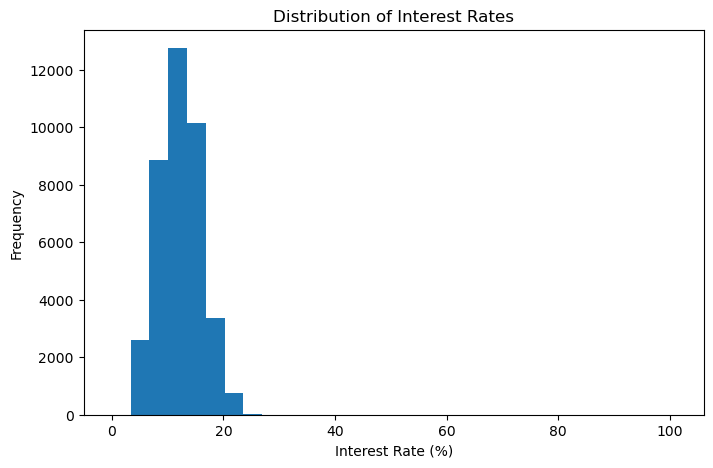

In [500]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df["int_rate"], bins=30)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rates")
plt.show()


### 2.3.1.2 Understanding distribution of features

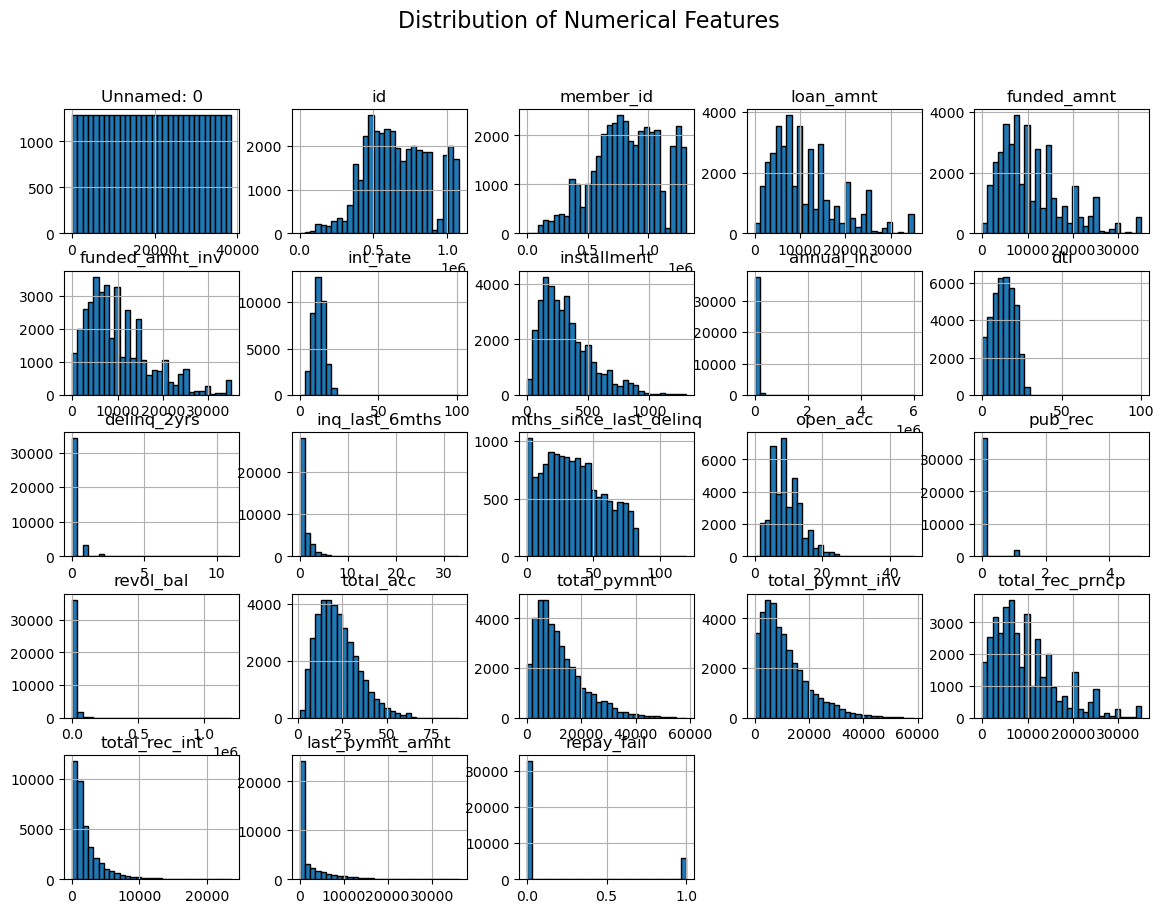

In [501]:
df[num_cols].hist(
    bins=30,
    figsize=(14, 10),
    edgecolor="black"
)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

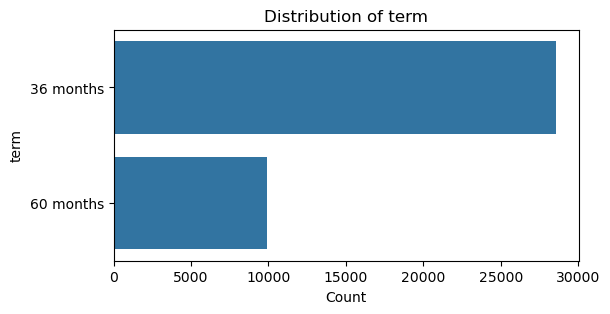

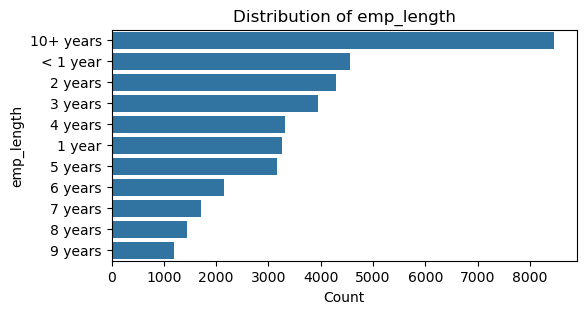

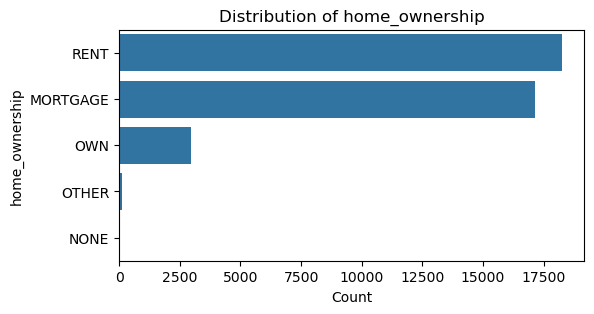

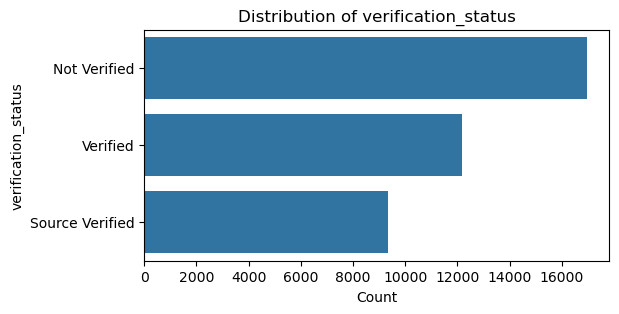

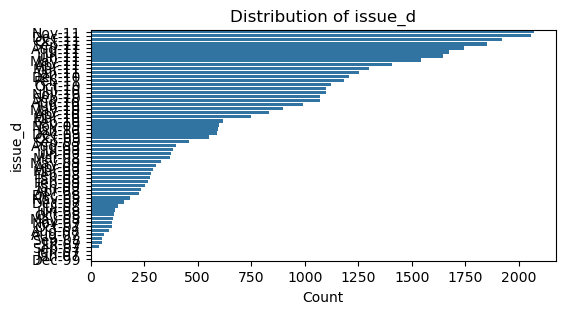

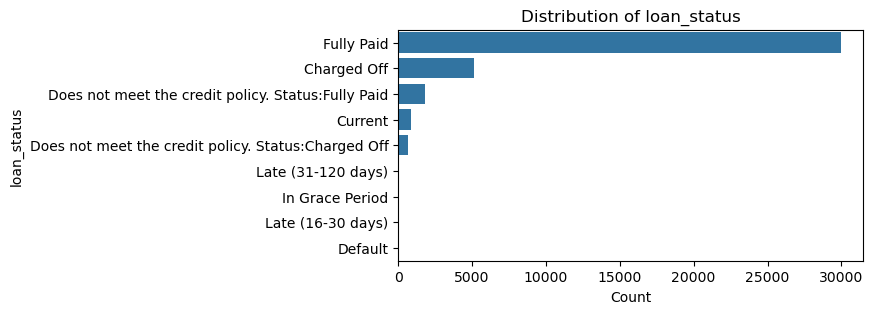

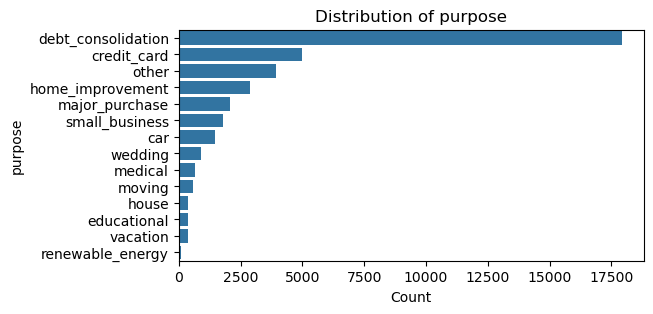

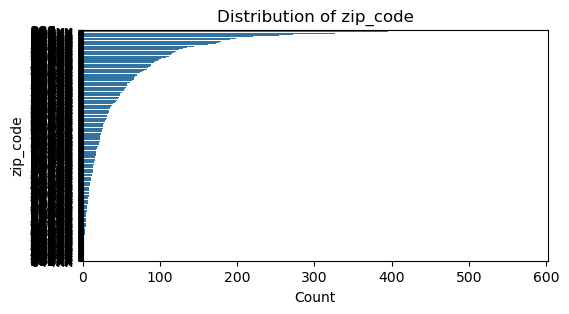

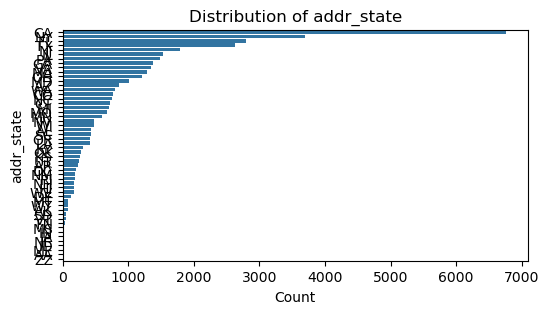

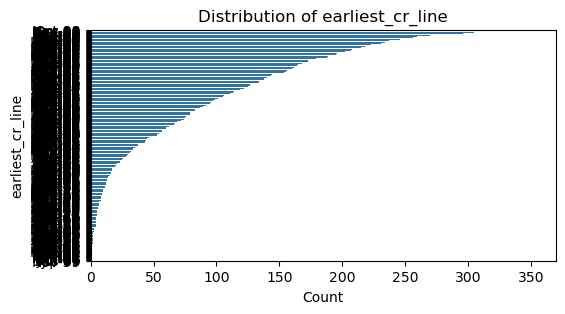

c:\Users\arcan\anaconda3\envs\mldp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arcan\anaconda3\envs\mldp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


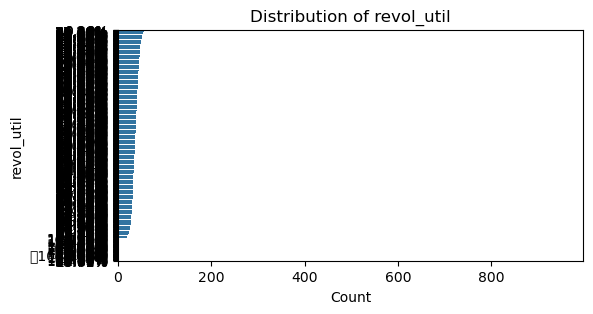

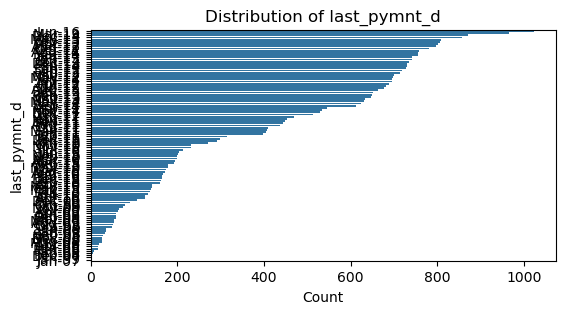

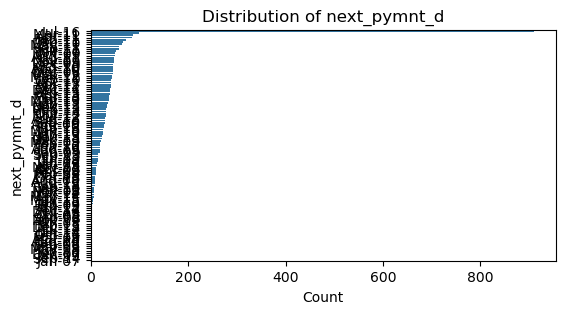

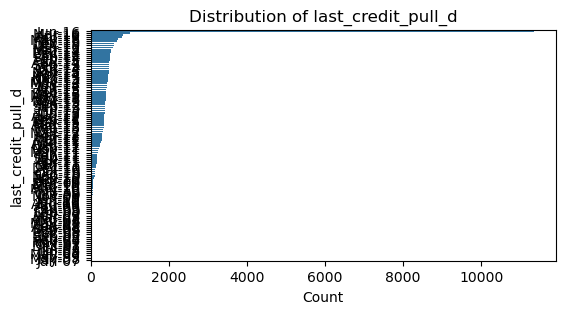

In [502]:
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

### 2.3.2 Understanding relationship between variables

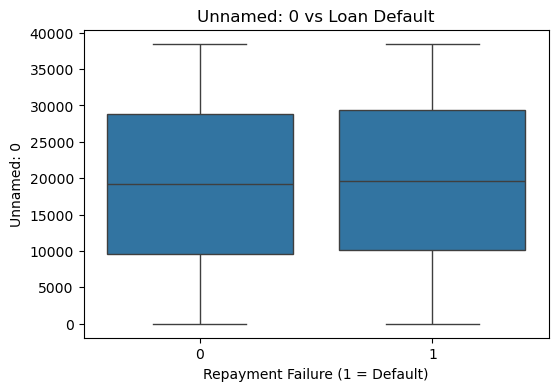

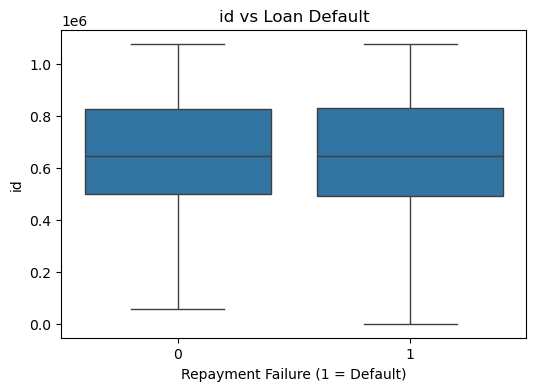

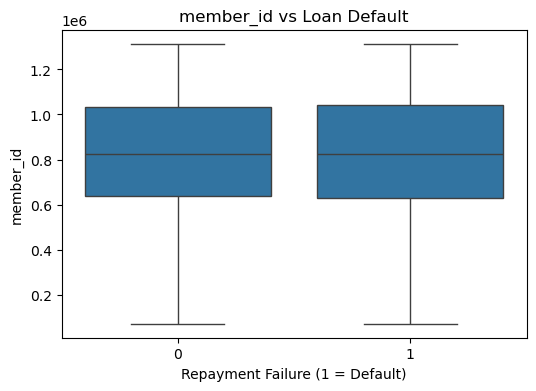

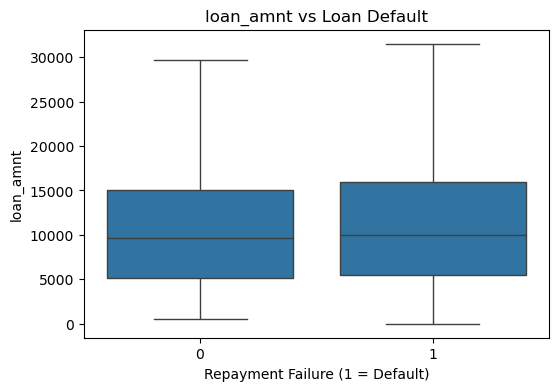

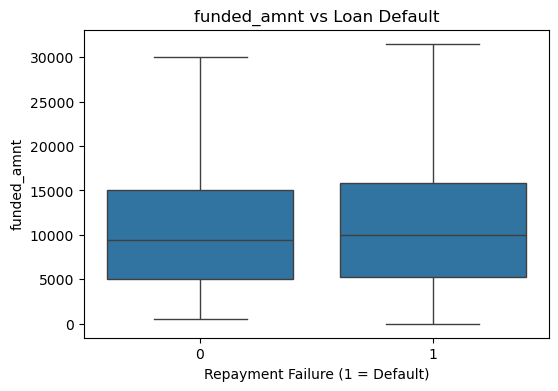

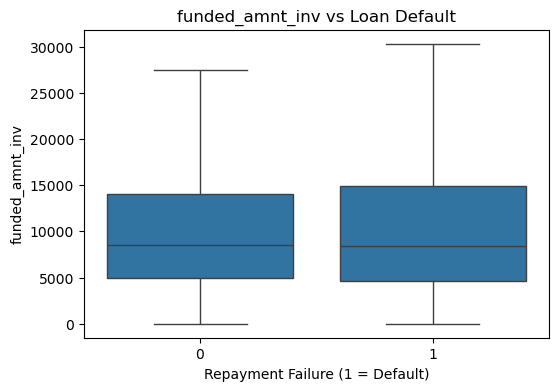

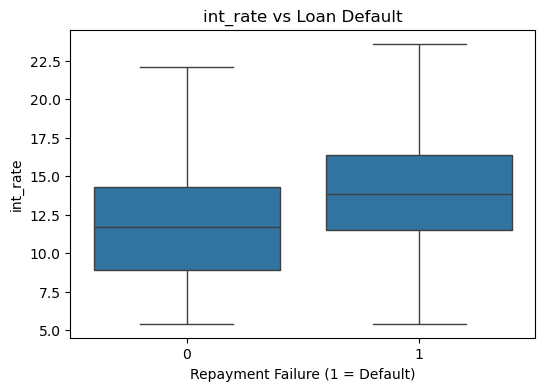

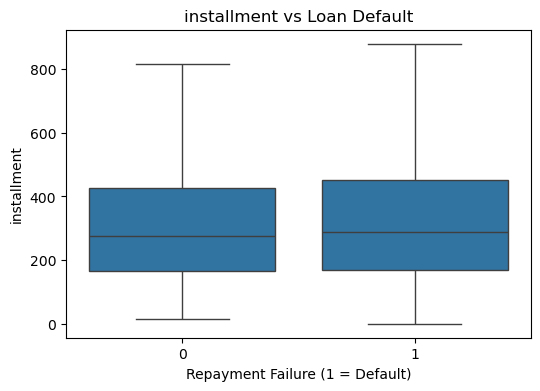

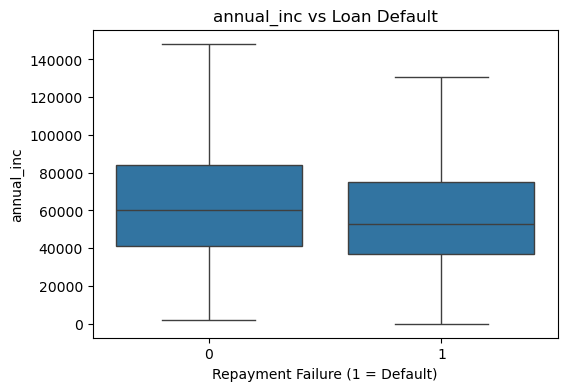

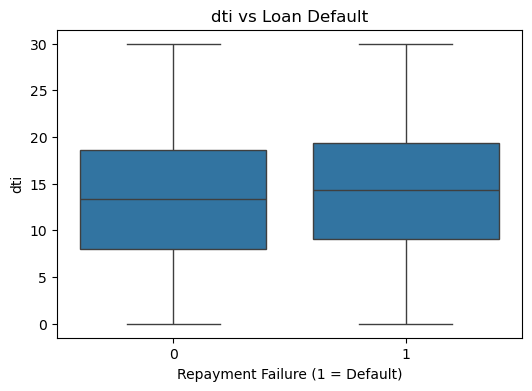

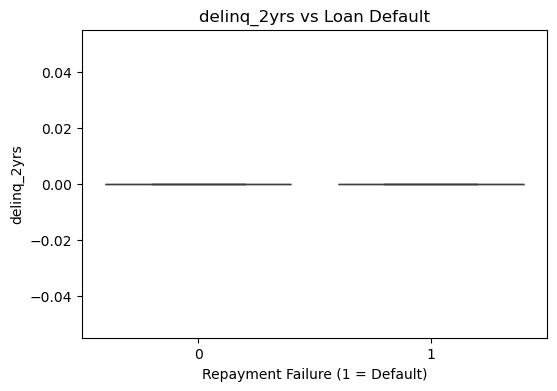

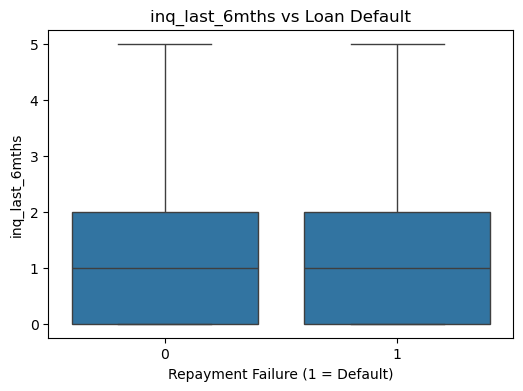

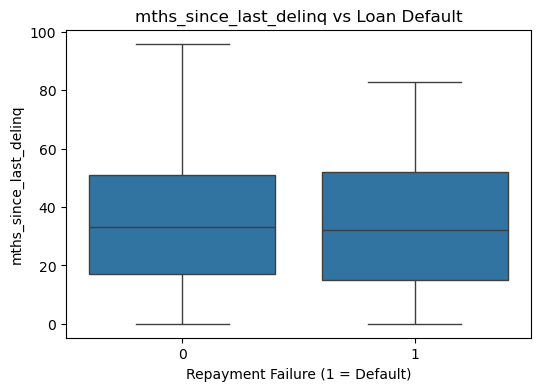

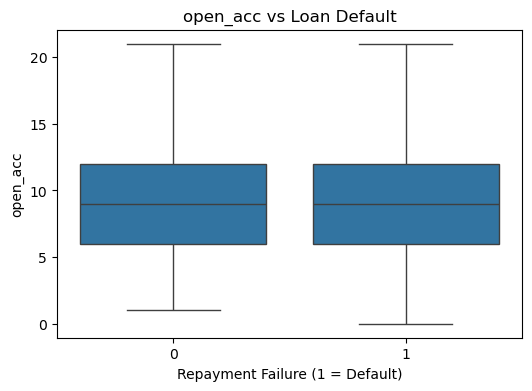

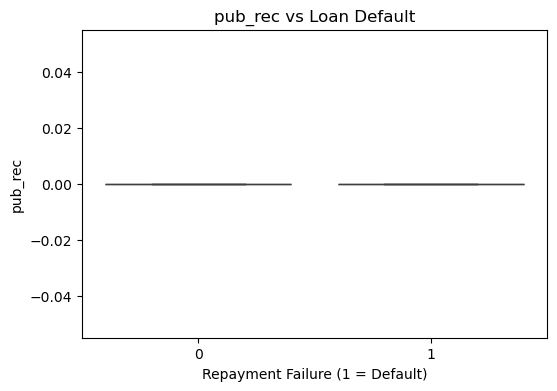

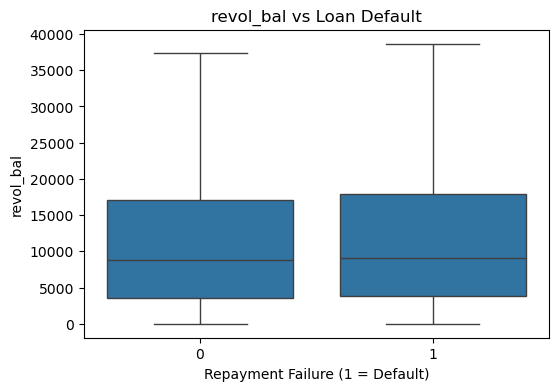

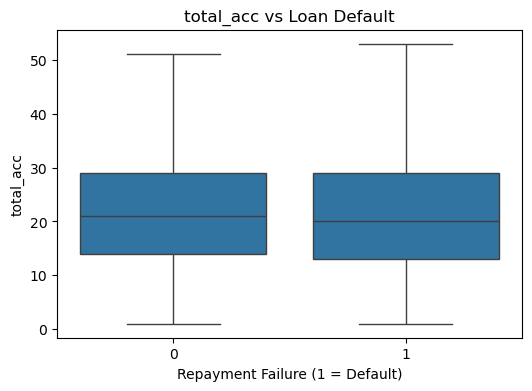

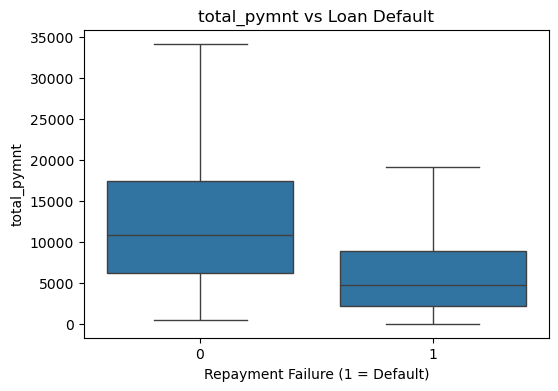

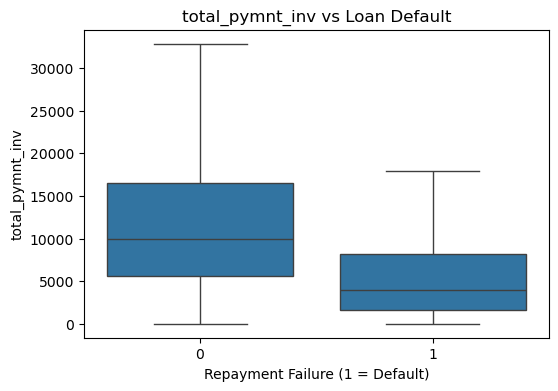

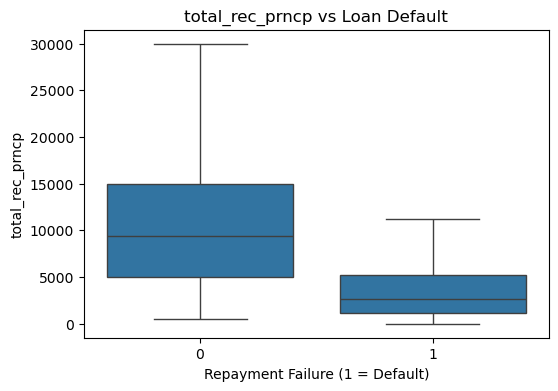

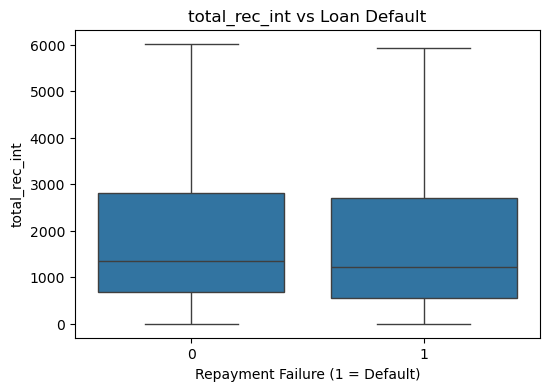

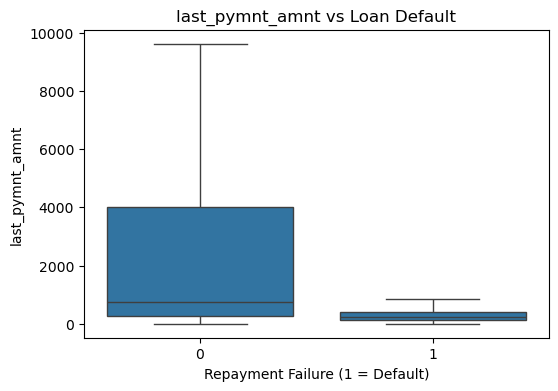

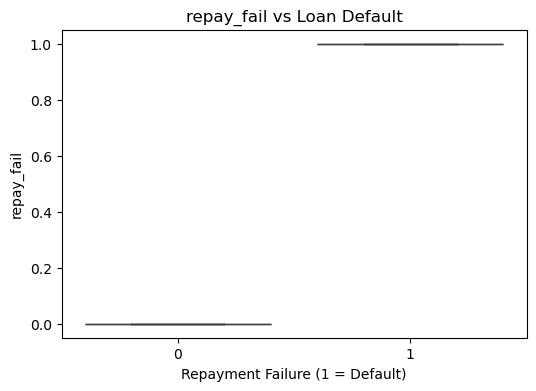

In [503]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x="repay_fail",
        y=col,
        data=df,
        showfliers=False
    )
    plt.title(f"{col} vs Loan Default")
    plt.xlabel("Repayment Failure (1 = Default)")
    plt.ylabel(col)
    plt.show()



In [504]:
print("\nDEFAULT RATE BY CATEGORY")
print("-" * 50)

for col in cat_cols:
    print("")
    print(
        df.groupby(col)["repay_fail"]
        .mean()
        .sort_values(ascending=False)
    )



DEFAULT RATE BY CATEGORY
--------------------------------------------------

term
60 months    0.233438
36 months    0.123142
Name: repay_fail, dtype: float64

emp_length
10+ years    0.160898
7 years      0.153349
1 year       0.151199
5 years      0.150426
8 years      0.149481
< 1 year     0.149398
6 years      0.148321
3 years      0.146738
4 years      0.143935
2 years      0.136300
9 years      0.135452
Name: repay_fail, dtype: float64

home_ownership
NONE        0.250000
OTHER       0.232000
RENT        0.158330
OWN         0.155849
MORTGAGE    0.142824
Name: repay_fail, dtype: float64

verification_status
Verified           0.167954
Source Verified    0.147732
Not Verified       0.141729
Name: repay_fail, dtype: float64

issue_d
Dec-99    1.000000
Oct-07    0.330000
Nov-07    0.297030
Dec-07    0.288462
Jan-08    0.282609
Aug-07    0.262295
Apr-08    0.248927
Sep-07    0.243902
May-08    0.215686
Mar-08    0.214092
Jul-08    0.212598
Feb-08    0.200704
Dec-11    0.186770
Sep-0

# 3. Data Preparation

## 3.1 Data Cleaning

I noticed that the int_rate column might contain invalid or extreme values.
I checked how many rows had interest rates of 0 or unusually high values (>50 and >100).
This is important because unrealistic interest rates can skew the data and negatively affect model performance if left uncleaned.

In [505]:
print("Rows with int_rate == 0:", (df["int_rate"] == 0).sum())
print("Rows with int_rate > 50:", (df["int_rate"] > 50).sum())
print("Rows with int_rate > 100:", (df["int_rate"] > 100).sum())

Rows with int_rate == 0: 1
Rows with int_rate > 50: 1
Rows with int_rate > 100: 1


In [506]:
df = df.loc[
    (df["int_rate"] > 0) &
    (df["int_rate"] <= 50)
].copy()

print("Remaining rows:", df.shape[0])

Remaining rows: 38478


I identified several columns that were either identifiers, outcome-related, or irrelevant noise.
I removed these columns to prevent data leakage and reduce unnecessary complexity.
This ensures the model learns only from valid predictive features and generalises better to unseen data.

What are identifiers. As this is a banking data set things such as total payment and total_rec_int would give away the the interest rate immidiatrly as it is a futher data which means it happens after interest rate is discovered. Location and addr_state is just noise that would not effectt interest rates and it is not reliable to train a model on all possiblities on the small of a data set hence these are taken out.

In [507]:
drop_cols = [
    # IDs
    "id", "member_id",
    
    # Leakage / outcomes
    "loan_status", "total_pymnt", "total_pymnt_inv",
    "total_rec_prncp", "total_rec_int",
    "last_pymnt_d", "last_pymnt_amnt",
    "next_pymnt_d", "last_credit_pull_d",
    "repay_fail","Unnamed: 0",
    
    # Location / noise
    "zip_code", "addr_state",
    
    "purpose"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])


I noticed the term column was stored as text instead of numbers.
I cleaned and converted it by removing the word “months” and casting it to an integer.
This is needed because models require numerical features for training and comparison.

In [508]:
df["term"] = (
    df["term"]
    .astype(str)
    .str.replace("months", "", regex=False)
    .str.strip()
    .astype(int)
)

I noticed the emp_length column was messy and inconsistent, with text values like “< 1 year”, “10+ years”, and missing entries.
I standardised it by converting everything into a numeric number of years and mapping invalid or missing values to 0.
This is important because consistent numerical values are required for modelling and meaningful comparisons.

In [509]:
def clean_emp_length(x):
    if pd.isna(x):
        return 0
    x = str(x).lower().strip()
    if x in ["n/a", "na"]:
        return 0
    if "<" in x:
        return 0
    if "+" in x:
        return 10
    try:
        return int(x.split()[0])
    except:
        return 0

df["emp_length"] = df["emp_length"].apply(clean_emp_length)


I noticed the revol_util column had missing values.
I filled the missing values with 0.Missing values were filled with 0 because no revolving balance implies no revolving credit utilisation.
This prevents losing rows and avoids introducing artificial averages that could misrepresent borrower risk.

In [510]:
df["revol_util"] = df["revol_util"].fillna(0)

I noticed some numerical features had missing values.
I filled these missing values using the median of each column.
This is appropriate because the median is robust to outliers and preserves the overall distribution of skewed financial data.

In [511]:
num_cols = [
    "annual_inc", "revol_bal",
    "installment", "loan_amnt"
]

for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

I noticed the date columns were stored as month–year strings and could not be used directly.
I converted them into proper datetime values and calculated the length of credit history in years.
This matters because credit history length is more informative for prediction than raw dates, so I kept the engineered feature and removed the original date column.

In [512]:
def parse_month_year(s):
    if pd.isna(s):
        return pd.NaT
    mon, yr = str(s).split("-")
    yr = int(yr)
    year = 2000 + yr if yr <= 24 else 1900 + yr
    month = pd.to_datetime(mon, format="%b").month
    return pd.Timestamp(year=year, month=month, day=1)

df["issue_d"] = df["issue_d"].apply(parse_month_year)
df["earliest_cr_line"] = df["earliest_cr_line"].apply(parse_month_year)

df["credit_history_years"] = (
    (df["issue_d"] - df["earliest_cr_line"]).dt.days / 365.25
)

df = df.drop(columns=["earliest_cr_line"])

I noticed that missing values in mths_since_last_delinq indicate no recorded delinquency.
I encoded this by filling missing values with a large placeholder (999) and creating a binary flag to indicate whether the borrower has ever been delinquent.
This helps the model distinguish between borrowers with and without delinquency history while keeping the feature numeric.

In [513]:
df["mths_since_last_delinq"] = df["mths_since_last_delinq"].fillna(999)

df["has_ever_delinquent"] = (df["mths_since_last_delinq"] < 999).astype(int)

I noticed revol_util was stored as a percentage string instead of a numeric value.
I cleaned and converted it by removing the percent sign and coercing it into a numeric format.
This is necessary because models require numerical inputs to learn effectively.

In [514]:
df["revol_util"] = (
    df["revol_util"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)

df["revol_util"] = pd.to_numeric(df["revol_util"], errors="coerce")

I noticed NONE in home_ownership represents a rare or ambiguous category.
I merged it into OTHER to reduce sparsity.
This helps stabilise categorical encoding and improves model generalisation.

In [515]:
df['home_ownership'] = df['home_ownership'].replace(['NONE'], 'OTHER')

In [516]:
print(df.isna().sum())

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
credit_history_years      0
has_ever_delinquent       0
dtype: int64


In [517]:
df.dtypes

loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                               int64
int_rate                         float64
installment                      float64
emp_length                         int64
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
dti                              float64
delinq_2yrs                      float64
inq_last_6mths                   float64
mths_since_last_delinq           float64
open_acc                         float64
pub_rec                          float64
revol_bal                        float64
revol_util                       float64
total_acc                        float64
credit_history_years             float64
has_ever_delinquent                int64
dtype: object

In [518]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns: ['home_ownership', 'verification_status']
Numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'credit_history_years', 'has_ever_delinquent']


In [519]:
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)

In [520]:
print("Before encoding:", df.shape)
print("After encoding :", df_encoded.shape)

Before encoding: (38478, 22)
After encoding : (38478, 25)


In [521]:
df_encoded.dtypes

loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                            int64
int_rate                                      float64
installment                                   float64
emp_length                                      int64
annual_inc                                    float64
issue_d                                datetime64[ns]
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq                        float64
open_acc                                      float64
pub_rec                                       float64
revol_bal                                     float64
revol_util                                    float64
total_acc                                     float64
credit_history_years        

### 3.1.2 EDA after cleaning

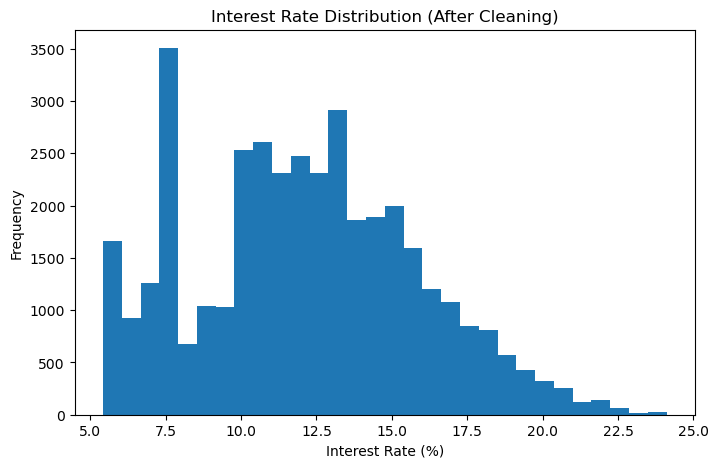

In [522]:
plt.figure(figsize=(8, 5))
plt.hist(df_encoded["int_rate"], bins=30)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.title("Interest Rate Distribution (After Cleaning)")
plt.show()

In [523]:
df_encoded["int_rate"].describe()

count    38478.000000
mean        12.162307
std          3.709485
min          5.420000
25%          9.620000
50%         11.990000
75%         14.720000
max         24.110000
Name: int_rate, dtype: float64

I noticed annual_inc and revol_bal were highly skewed.
I applied a log transformation to reduce skewness and compress extreme values.
This helps the model learn more stable patterns and improves performance.

In [524]:
df_encoded["log_annual_inc"] = np.log1p(df_encoded["annual_inc"])
df_encoded["log_revol_bal"] = np.log1p(df_encoded["revol_bal"])

I noticed that individual features may not fully capture borrower risk on their own.
I created interaction features to model how variables behave together, such as debt burden with credit usage and income with credit history length.
This helps the model capture more realistic risk relationships.

For example, two borrowers can have the same DTI, but the one with higher revolving credit utilisation is riskier, which is captured by dti_x_revol_util.
Similarly, two borrowers may earn the same income, but the one with a longer credit history is more reliable, which is reflected in income_x_credit_history.

In [525]:
df_encoded["dti_x_revol_util"] = df_encoded["dti"] * df_encoded["revol_util"]
df_encoded["income_x_credit_history"] = (
    df_encoded["annual_inc"] * df_encoded["credit_history_years"]
)

I noticed the loan issue date still contained useful timing information.
I extracted the year and month as numerical features and removed the original date column.
This allows the model to capture time-related patterns without using raw datetime values.

In [526]:
df_encoded["issue_year"] = df["issue_d"].dt.year
df_encoded["issue_month"] = df["issue_d"].dt.month
df_encoded = df_encoded.drop(columns=["issue_d"])

Noticed data still contained data that would give away interest rate seeing as they are future data, data that is inserted after interest rate was added.

In [527]:
leakage_cols = [
    "installment",
    "funded_amnt",
    "funded_amnt_inv"
]

df_encoded = df_encoded.drop(columns=leakage_cols)

In [528]:
corr = df_encoded.corr(numeric_only=True)["int_rate"].sort_values(ascending=False)
corr

int_rate                               1.000000
revol_util                             0.455914
term                                   0.428809
dti_x_revol_util                       0.362494
loan_amnt                              0.290550
has_ever_delinquent                    0.231412
verification_status_Verified           0.178840
inq_last_6mths                         0.177838
delinq_2yrs                            0.155339
dti                                    0.119601
pub_rec                                0.099503
log_revol_bal                          0.098146
revol_bal                              0.083854
log_annual_inc                         0.075429
home_ownership_RENT                    0.062682
annual_inc                             0.055171
issue_month                            0.032068
open_acc                               0.026080
income_x_credit_history                0.014653
emp_length                             0.011311
home_ownership_OTHER                   0

I checked how all numerical features correlate with int_rate.
I ranked them and selected the top five most strongly correlated features.
This helps identify the most influential predictors and guides feature selection.

In [529]:
top_features = corr.drop("int_rate").head(5).index.tolist()
top_features

['revol_util', 'term', 'dti_x_revol_util', 'loan_amnt', 'has_ever_delinquent']

In [530]:
df_encoded = df_encoded[df_encoded["revol_util"] < 110].copy()

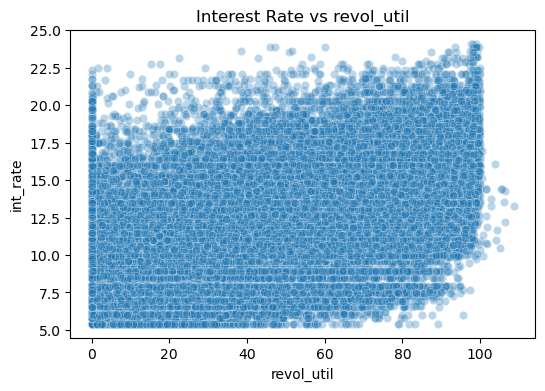

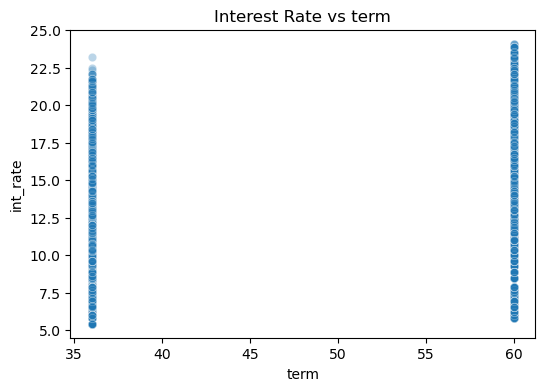

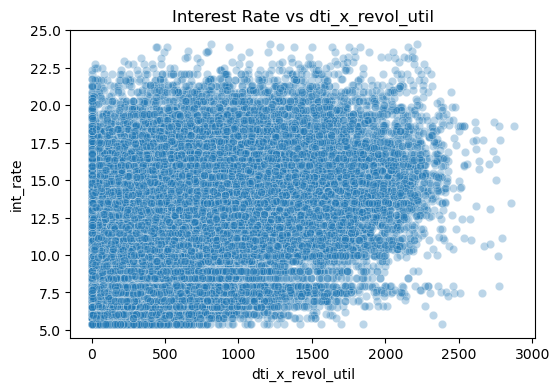

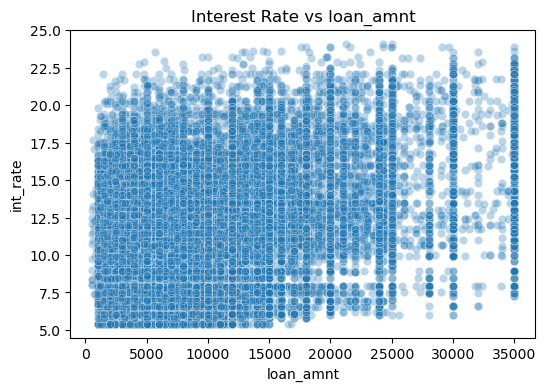

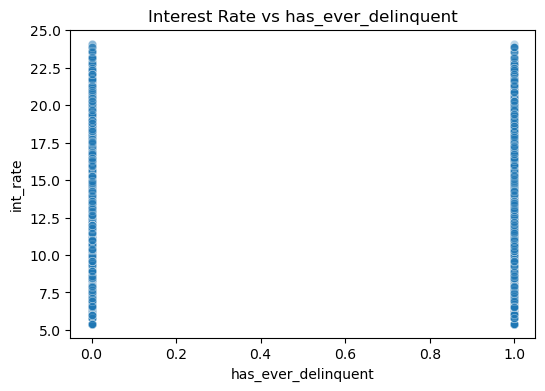

In [531]:
for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=df_encoded[col],
        y=df_encoded["int_rate"],
        alpha=0.3
    )
    plt.title(f"Interest Rate vs {col}")
    plt.show()

Justification: This addresses high-leverage points. In your scatter plot, data points beyond 2500 are isolated anomalies. Because regression models are sensitive to extreme values, these few points can "pull" the entire prediction line out of place. Removing them forces the model to prioritize the 99% of typical borrowers rather than being skewed by a few extreme debt profiles.

In [532]:
df_encoded = df_encoded[df_encoded['dti_x_revol_util'] < 2500]

from scipy import stats
df_encoded = df_encoded[(np.abs(stats.zscore(df_encoded['dti_x_revol_util'])) < 3)]

I noticed the relationship between these variables and the target may be non-linear.
I added squared terms to capture curvature effects.
This allows the model to learn non-linear risk patterns without using complex models.

In [533]:
df_encoded["dti_sq"] = df_encoded["dti"] ** 2
df_encoded["revol_util_sq"] = df_encoded["revol_util"] ** 2

I noticed that debt burden and credit utilisation interact with each other.
I created an interaction term by multiplying dti and revol_util.
This helps the model capture combined risk effects that single features cannot represent.

For example, two borrowers may have the same DTI, but the one using a higher percentage of revolving credit is riskier, which is captured by the dti_x_revol_util feature.

In [534]:
df_encoded["dti_x_revol_util"] = (
    df_encoded["dti"] * df_encoded["revol_util"]
)

In [535]:
df_encoded.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
emp_length                               int64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
credit_history_years                   float64
has_ever_delinquent                      int64
home_ownership_OTHER                      bool
home_ownership_OWN                        bool
home_ownership_RENT                       bool
verification_status_Source Verified       bool
verification_status_Verified              bool
log_annual_in

In [536]:
df_encoded.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
credit_history_years                   0
has_ever_delinquent                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
log_annual_inc                         0
log_revol_bal                          0
dti_x_revol_util                       0
income_x_credit_

I noticed the effect of loan issue year may not be linear.
I added a squared term to capture non-linear time effects.
This allows the model to learn changes in behaviour across different periods more accurately.

Loans from 2008 → 2009 might behave very differently from 2018 → 2019 because of policy changes or economic conditions.

Squaring issue_year lets the model capture accelerating or slowing trends over time, instead of forcing a straight-line effect.

This feature allows the model to capture non-linear temporal patterns rather than assuming time affects risk evenly.

In [537]:
df_encoded["issue_year_sq"] = df_encoded["issue_year"] ** 2

Checking if logical links are true within dataset.

In [538]:
df_encoded.groupby("has_ever_delinquent")["int_rate"].mean()

has_ever_delinquent
0    11.502877
1    13.284354
Name: int_rate, dtype: float64

In [539]:
home_cols = [c for c in df_encoded.columns if c.startswith("home_ownership_")]

df_encoded.groupby(home_cols)["int_rate"].mean().head()

home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT
False                 False               False                  11.931486
                                          True                   12.403361
                      True                False                  11.913559
True                  False               False                  12.731811
Name: int_rate, dtype: float64

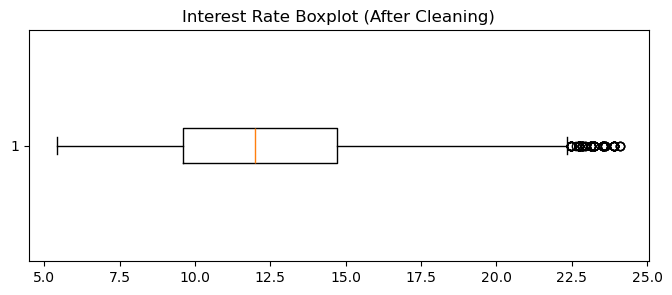

In [540]:
plt.figure(figsize=(8, 3))
plt.boxplot(df_encoded["int_rate"], vert=False)
plt.title("Interest Rate Boxplot (After Cleaning)")
plt.show()

## 3.2 train test split

In [541]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["int_rate"])
y = df_encoded["int_rate"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=981673
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (30721, 29)
Test shape : (7681, 29)


I noticed the features were on very different scales.
I applied standardisation using StandardScaler, fitting it on the training data and applying it to the test data.
This is important to prevent data leakage and ensure models that are scale-sensitive learn correctly.

In [542]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modelling

### 4.2 Train Model

These models were chosen to progressively increase model complexity and capture both linear and non-linear patterns while benchmarking performance improvements.

In [543]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [544]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=67,
    max_depth=5  # prevent extreme overfitting
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [545]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=67,
    n_jobs=-1,
    max_depth=10
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [546]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    random_state=67
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# 5. Model Evaluation

In [547]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

results = []

def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results.append(evaluate_model("Gradient Boosting", y_test, y_pred_gbr))

results_df = pd.DataFrame(results)
results_df

,Model,R2,MAE,RMSE
0,Linear Regression,0.578101,1.889097,2.410642
1,Decision Tree,0.480447,2.139183,2.675122
2,Random Forest,0.650615,1.706598,2.193718
3,Gradient Boosting,0.686092,1.629713,2.079359


In [548]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Train metrics
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Test metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("TRAIN PERFORMANCE")
print("R2:", train_r2)
print("MAE:", train_mae)
print("RMSE:", train_rmse)

print("\nTEST PERFORMANCE")
print("R2:", test_r2)
print("MAE:", test_mae)
print("RMSE:", test_rmse)


TRAIN PERFORMANCE
R2: 0.6938252248961537
MAE: 1.6067540847043835
RMSE: 2.0509520229083162

TEST PERFORMANCE
R2: 0.6860923103195846
MAE: 1.6297133078831763
RMSE: 2.079359401040426


Best modal goes to Gradient Boosting forest with the highest R2 and Lowest MAE and RMSE without overfitting

In [549]:
X.columns

Index(['loan_amnt', 'term', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'credit_history_years',
       'has_ever_delinquent', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'log_annual_inc', 'log_revol_bal',
       'dti_x_revol_util', 'income_x_credit_history', 'issue_year',
       'issue_month', 'dti_sq', 'revol_util_sq', 'issue_year_sq'],
      dtype='object')

## Iterative model development


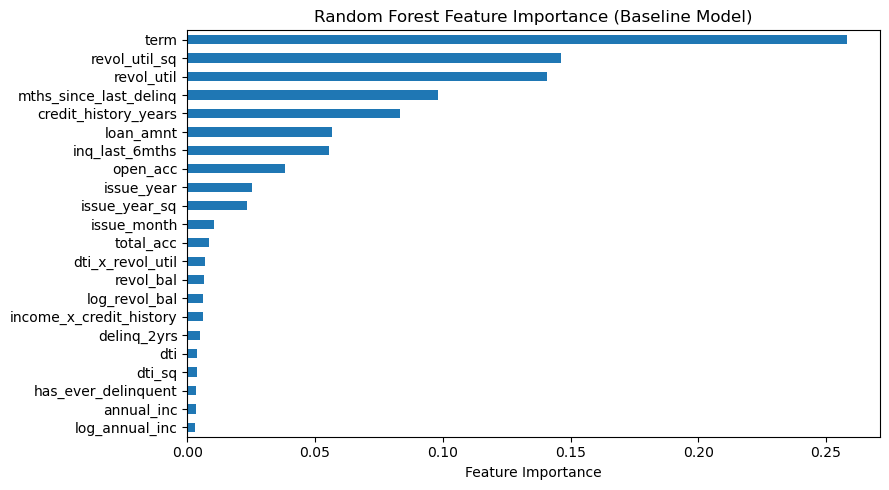

In [550]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute importance
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(9, 5))
rf_importance.head(22).sort_values().plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (Baseline Model)")
plt.tight_layout()
plt.show()

In [551]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = gbr.predict(X_test)
residuals = y_test - y_pred

print("GBR Test R2  :", r2_score(y_test, y_pred))
print("GBR Test MAE :", mean_absolute_error(y_test, y_pred))
print("GBR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

GBR Test R2  : 0.6860923103195846
GBR Test MAE : 1.6297133078831763
GBR Test RMSE: 2.079359401040426


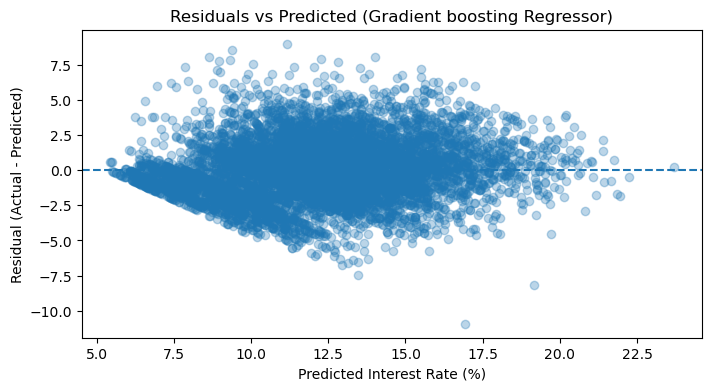

In [552]:
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Interest Rate (%)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted (Gradient boosting Regressor)")
plt.show()

In [553]:
residual_df = X_test.copy()
residual_df["actual_rate"] = y_test.values
residual_df["predicted_rate"] = y_pred
residual_df["residual"] = residuals.values

print("Most over-priced (model predicted LOWER than actual):")
display(residual_df.sort_values("residual").head(10)[
    ["actual_rate","predicted_rate","residual"]
])

print("\nMost under-priced (model predicted HIGHER than actual):")
display(residual_df.sort_values("residual", ascending=False).head(10)[
    ["actual_rate","predicted_rate","residual"]
])

Most over-priced (model predicted LOWER than actual):


,actual_rate,predicted_rate,residual
22774,6.00,16.923328,-10.923328
23309,10.99,19.172297,-8.182297
23022,6.00,13.465822,-7.465822
19798,6.17,12.942461,-6.772461
35560,6.54,13.122017,-6.582017
10161,6.91,13.465379,-6.555379
33091,6.91,13.315129,-6.405129
11501,6.54,12.883048,-6.343048
6739,7.49,13.793061,-6.303061
20779,6.54,12.670194,-6.130194



Most under-priced (model predicted HIGHER than actual):


,actual_rate,predicted_rate,residual
13268,20.16,11.172243,8.987757
10889,17.93,9.367136,8.562864
13357,16.70,8.621732,8.078268
37956,22.06,14.016363,8.043637
36939,20.17,12.263901,7.906099
13944,17.14,9.321484,7.818516
30774,16.70,8.956542,7.743458
5388,20.52,12.803950,7.716050
33890,17.58,10.045170,7.534830
17805,15.21,7.844107,7.365893


In [554]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

param_dist = {
    "n_estimators": [300, 500, 800, 1200, 1500],
    "max_depth": [None, 10, 15, 20, 25, 30],
    "min_samples_leaf": [1, 5, 10, 20, 30, 40, 50],
    "max_features": ["sqrt", 0.3, 0.5]
}

previously ran random search

Parameters n_estimators 1200 criterion 'squared_error' max_depth None min_samples_split 2 min_samples_leaf 5 min_weight_fraction_leaf 0.0 max_features 0.5 max_leaf_nodes None min_impurity_decrease 0.0 bootstrap True oob_score False n_jobs -1 random_state 42 verbose 0 warm_start False ccp_alpha 0.0 max_samples None monotonic_cst None

In [555]:
param_dist_fast = {
    "n_estimators": [300, 500, 800],
    "max_depth": [8, 10, 12, 15],
    "min_samples_leaf": [5, 10, 15, 20],
    "max_features": ["sqrt"]
}

In [556]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

# -----------------------------
# Parameter space (controlled)
# -----------------------------
param_dist_gbr = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [5, 10, 20],
    "subsample": [0.7, 0.85, 1.0]
}

# MAE scorer (minimise error)
mae_scorer = make_scorer(
    mean_absolute_error,
    greater_is_better=False
)

# Base model
gbr_base = GradientBoostingRegressor(
    random_state=67
)

# -----------------------------
# Randomised search
# -----------------------------
gbr_search = RandomizedSearchCV(
    estimator=gbr_base,
    param_distributions=param_dist_gbr,
    n_iter=38,
    scoring=mae_scorer,
    cv=5,
    random_state=67,
    n_jobs=-1,
    verbose=2
)

# Fit search
gbr_search.fit(X_train, y_train)


Fitting 5 folds for each of 38 candidates, totalling 190 fits


,estimator,GradientBoost...ndom_state=67)
,param_distributions,"{'learning_rate': [0.03, 0.05, ...], 'max_depth': [3, 4, ...], 'min_samples_leaf': [5, 10, ...], 'n_estimators': [200, 300, ...], ...}"
,n_iter,38
,scoring,make_scorer(m...hod='predict')
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,67
,error_score,nan


In [557]:
import pandas as pd

fast_results = pd.DataFrame(gbr_search.cv_results_)
fast_results = fast_results.sort_values("mean_test_score")

fast_results[
    ["mean_test_score",
     "param_n_estimators",
     "param_max_depth",
     "param_min_samples_leaf"]
].tail(10)


,mean_test_score,param_n_estimators,param_max_depth,param_min_samples_leaf
22,-1.477480,300,4,20
31,-1.477188,500,5,20
29,-1.476430,500,4,5
4,-1.475235,300,5,20
2,-1.473682,500,4,20
13,-1.472945,500,4,5
11,-1.472443,500,5,10
6,-1.472398,500,5,20
32,-1.471100,500,5,5
25,-1.464517,500,5,20


In [558]:
best_gbr = gbr_search.best_estimator_
best_gbr


,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,0.85
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_tuned = best_gbr.predict(X_test)

print("Final GBR")
print("R2  :", r2_score(y_test, y_pred_tuned))
print("MAE :", mean_absolute_error(y_test, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("")
print("Base GBR")
print("GBR Test R2  :", r2_score(y_test, y_pred))
print("GBR Test MAE :", mean_absolute_error(y_test, y_pred))
print("GBR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Final GBR (Fast Search)
R2  : 0.738604212137765
MAE : 1.4543330486524098
RMSE: 1.8974829206423944

Base GBR
GBR Test R2  : 0.6860923103195846
GBR Test MAE : 1.6297133078831763
GBR Test RMSE: 2.079359401040426


In [564]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# -------------------------
# BASE Gradient Boosting
# -------------------------
y_train_pred_base = gbr.predict(X_train)
y_test_pred_base = gbr.predict(X_test)

base_gbr_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "R2": [
        r2_score(y_train, y_train_pred_base),
        r2_score(y_test, y_test_pred_base)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred_base),
        mean_absolute_error(y_test, y_test_pred_base)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred_base)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_base))
    ]
})

# -------------------------
# TUNED Gradient Boosting
# -------------------------
final_gbr = best_gbr

y_train_pred_tuned = final_gbr.predict(X_train)
y_test_pred_tuned = final_gbr.predict(X_test)

tuned_gbr_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "R2": [
        r2_score(y_train, y_train_pred_tuned),
        r2_score(y_test, y_test_pred_tuned)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_train_pred_tuned),
        mean_absolute_error(y_test, y_test_pred_tuned)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_train_pred_tuned)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
    ]
})

# -------------------------
# Display results
# -------------------------
print("Base GBR Performance")
print(base_gbr_df.round(3))
print("\nTuned GBR Performance")
print(tuned_gbr_df.round(3))


Base GBR Performance
  Dataset     R2    MAE   RMSE
0   Train  0.694  1.607  2.051
1    Test  0.686  1.630  2.079

Tuned GBR Performance
  Dataset     R2    MAE   RMSE
0   Train  0.789  1.298  1.704
1    Test  0.739  1.454  1.897


The tuned Gradient Boosting model shows strong overall performance for predicting loan interest rates.

The R² of 0.739 on the test set indicates that the model explains a substantial proportion of the variation in interest rates, which is good for a real-world financial prediction task where rates are influenced by many factors.

The MAE of 1.454 means that, on average, the predicted interest rate differs from the actual rate by about 1.45 percentage points, which is reasonably accurate for giving borrowers an early estimate.

The RMSE of 1.897 suggests that larger errors are limited, indicating stable predictions without extreme mispricing.

The small gap between training and test performance shows that the model generalises well and is not overfitting, making it suitable for practical use as a pre-application interest rate estimator rather than an exact pricing engine.

This model performs well given the constraints of the available data. Loan interest rates are influenced by many factors that are not present in the dataset, such as lender-specific pricing policies, current market conditions, promotional rates, and internal risk assessments. Since the model only uses borrower-provided financial and credit information, it cannot capture all real-world pricing decisions.

Despite these limitations, the tuned Gradient Boosting model explains a large portion of the variance in interest rates and maintains low prediction error on unseen data. The strong generalisation performance indicates that the model is extracting most of the predictive signal available from the features provided. Any further improvement would likely require additional external data rather than a more complex model.

                     R2    MAE   RMSE
Model                                
Base RF           0.651  1.707  2.194
Final RF (Tuned)  0.739  1.454  1.897


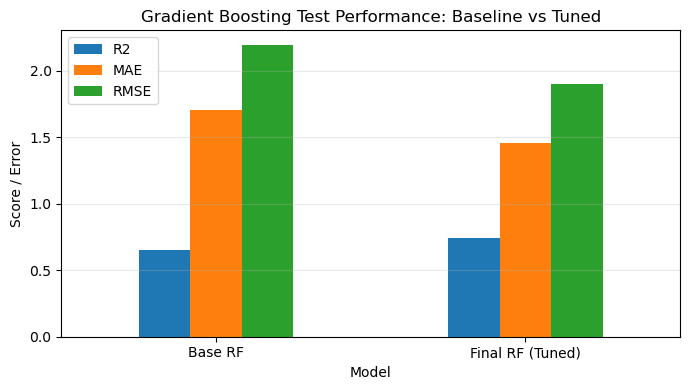

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# -------------------------
# Predictions (make explicit)
# -------------------------
y_test_pred_base = rf.predict(X_test)  
y_test_pred_tuned = final_gbr.predict(X_test)  

# -------------------------
# Metrics
# -------------------------
baseline_rf = {
    "Model": "Base RF",
    "R2": r2_score(y_test, y_test_pred_base),
    "MAE": mean_absolute_error(y_test, y_test_pred_base),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_base))
}

tuned_rf = {
    "Model": "Final RF (Tuned)",
    "R2": r2_score(y_test, y_test_pred_tuned),
    "MAE": mean_absolute_error(y_test, y_test_pred_tuned),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
}

# -------------------------
# Comparison table
# -------------------------
comp = pd.DataFrame([baseline_rf, tuned_rf]).set_index("Model")
print(comp.round(3))

# -------------------------
# Plot
# -------------------------
comp.plot(kind="bar", figsize=(7, 4))
plt.title("Gradient Boosting Test Performance: Baseline vs Tuned")
plt.ylabel("Score / Error")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


I selected the tuned Gradient Boosting model because it shows clear improvements over the baseline on the test set.
The tuned model achieves a higher R², indicating it explains more variance in the target, and lower MAE and RMSE, showing more accurate and less volatile predictions.
Since these gains appear on unseen data rather than only on training data, this suggests the improvements come from better hyperparameter settings rather than overfitting.

In [566]:
import joblib
# Save the tuned model
joblib.dump(final_gbr, 'Best_gradient_boosting_model.pkl', compress=9)

['Best_gradient_boosting_model.pkl']

In [568]:
joblib.dump(df_encoded.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']